#Spam Mails Detection Using Naive Bayes Algorithms

**Loading the Data**

https://www.kaggle.com/venky73/spam-mails-dataset

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
dataSet = pd.read_csv('/content/drive/My Drive/data/spam_ham_dataset.csv')

In [3]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [4]:
dataSet.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
spam = dataSet[dataSet['label'] == 'spam'].shape[0]
ham = dataSet[dataSet['label'] == 'ham'].shape[0]

Spam:		 1499
Ham:		 3672
Spam Percentage: 0.2898859021465867



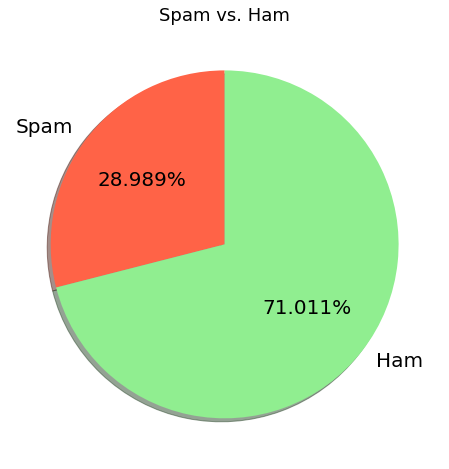

In [7]:
spam_percentage = spam / (spam + ham)


print('Spam:\t\t', spam)
print('Ham:\t\t', ham)
print('Spam Percentage:', spam_percentage, end='\n\n')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Spam vs. Ham', size=18)
plt.pie([spam, ham], labels=['Spam', 'Ham'], colors=['tomato', 'lightgreen'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

In [8]:
dataSet = dataSet[['text', 'label_num']]
dataSet.rename(columns={"label_num": "class"}, inplace=True)
dataSet.head(10)

,text,class
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
5,Subject: ehronline web address change\r\nthis ...,0
6,Subject: spring savings certificate - take 30 ...,0
7,Subject: looking for medication ? we ` re the ...,1
8,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,"Subject: nominations for oct . 21 - 23 , 2000\...",0


**Importing NLTK Library**

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
n =  dataSet.shape[0]
corpus = []
ps = PorterStemmer()

for i in range(n):
    text = re.sub('[^a-zA-Z]', ' ', dataSet['text'][i].lower())
    text = text.split()  # Spliting text into words
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Removing stopwords & # stemming
    text = ' '.join(text)  #Joining text
    corpus.append(text)

**Features Extraction**

**Splitting the dataset into the Training set and Test set**

In [11]:
X = corpus
y = dataSet.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

In [12]:
cv.vocabulary_

{'subject': 26102,
 'half': 12540,
 'day': 7319,
 'vac': 28440,
 'dentist': 7686,
 'appt': 1454,
 'august': 1941,
 'estim': 9822,
 'avail': 2019,
 'victor': 28765,
 'lamadrid': 15868,
 'ect': 8983,
 'carlo': 4587,
 'rodriguez': 23490,
 'hou': 13399,
 'georg': 11651,
 'smith': 25134,
 'randal': 22546,
 'gay': 11512,
 'pat': 20454,
 'clyne': 5709,
 'corp': 6473,
 'enron': 9510,
 'patti': 20484,
 'sullivan': 26185,
 'cc': 4801,
 'cindi': 5437,
 'vachuska': 28446,
 'clarissa': 5543,
 'garcia': 11443,
 'meredith': 17710,
 'mitchel': 18085,
 'cynthia': 7115,
 'franklin': 11085,
 'molli': 18213,
 'sumrow': 26203,
 'victoria': 28767,
 'versen': 28680,
 'alvin': 940,
 'thompson': 27060,
 'angi': 1164,
 'zeman': 30500,
 'jess': 14912,
 'villarr': 28820,
 'joann': 15019,
 'collin': 5888,
 'robert': 23455,
 'allwein': 871,
 'christina': 5320,
 'sanchez': 23891,
 'joe': 15030,
 'casa': 4656,
 'edward': 9035,
 'terri': 26870,
 'tricia': 27615,
 'bowen': 3541,
 'beverli': 2902,
 'beati': 2560,
 'stev

In [13]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('Precision:', precision_score(y_test, y_pred), sep='\t')
  print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy:	0.9535962877030162
Precision:	0.9479768786127167
Recall:		0.8864864864864865




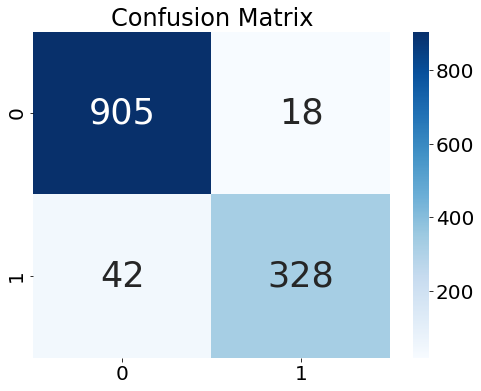

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using BernoulliNB

Accuracy:	0.8391337973704563
Precision:	0.9175257731958762
Recall:		0.4810810810810811




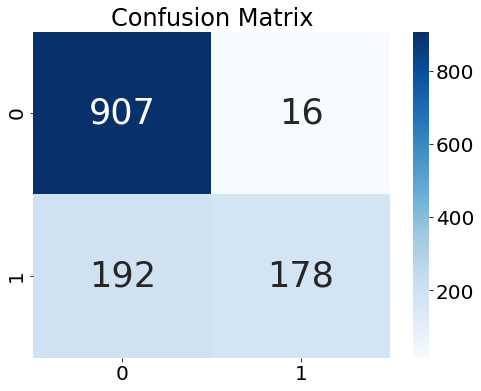

In [15]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.9806651198762568
Precision:	0.967479674796748
Recall:		0.9648648648648649




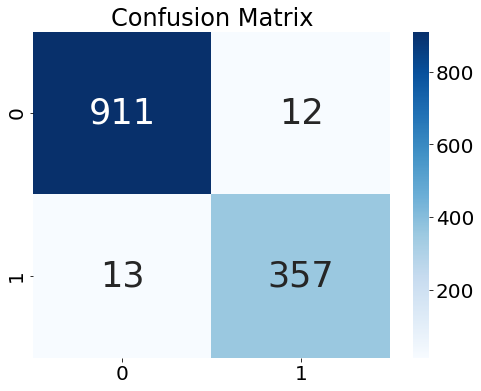

In [16]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.9783449342614076
Precision:	0.9697802197802198
Recall:		0.9540540540540541




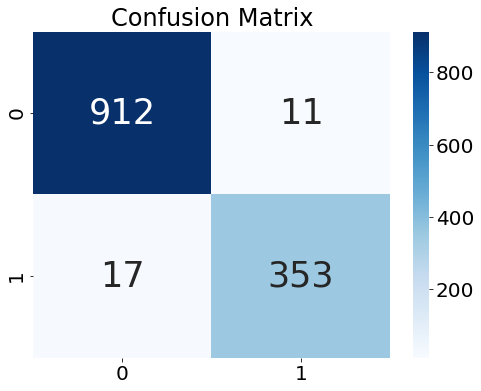

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)